In [1]:
project_name = "SeamTaping"
# project_name = "WRB"

Add paths to the project directory and the directory containing utils

In [2]:
import sys
import os

# Add the path to the project directory
utils_path = os.path.abspath('..')
if utils_path not in sys.path:
    sys.path.append(utils_path)
# Add the path to the directory containing utils to sys.path
utils_path = os.path.abspath('../utils')
if utils_path not in sys.path:
    sys.path.append(utils_path)
print(sys.path)

['c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\python312.zip', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\DLLs', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice', '', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages\\win32', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\User\\.conda\\envs\\Azure-Custom-Vision-Practice\\Lib\\site-packages\\Pythonwin', 'd:\\Work\\Crack-Detection', 'd:\\Work\\Crack-Detection\\utils']


## Create JSON dataset with bounding box annotations

In [3]:
import json
from utils.transform_functions import points_to_bbox

xlsx_dataset_name = f"{project_name}_All"
json_dataset_name_polygon = xlsx_dataset_name + '_polygon_annotations'
json_dataset_path_polygon = '../dataset/' + json_dataset_name_polygon + '.json'
# Read the input JSON file
with open(json_dataset_path_polygon, 'r') as f:
    input_data = json.load(f)

def transform_data(data):
    transformed = []
    for item in data:
        image_urls = item["image_urls"]  # Using the first URL in the list
        annotations = []
        for annotation in item["annotations"]:
            bbox = points_to_bbox(annotation["points"])
            annotations.append({
                "label": annotation["label"],
                "bbox": bbox
            })
        transformed.append({
            "image_file_name": item['image_file_name'],
            "image_urls": image_urls,
            "annotations": annotations
        })
    return transformed

# Transform the data
output_data = transform_data(input_data)

# Save the transformed data to a new JSON file
json_dataset_name_bbox = xlsx_dataset_name + '_bbox_annotations'
json_dataset_path_bbox = '../dataset/' + json_dataset_name_bbox + '.json'
with open(json_dataset_path_bbox, 'w') as f:
    json.dump(output_data, f, indent=2)

print(f"Transformed dataset saved to '{json_dataset_path_bbox}'")


Transformed dataset saved to '../dataset/SeamTaping_All_bbox_annotations.json'


### Check the created JSON dataset with bounding box annotations

Visualize random 3 images with bbox annotations.


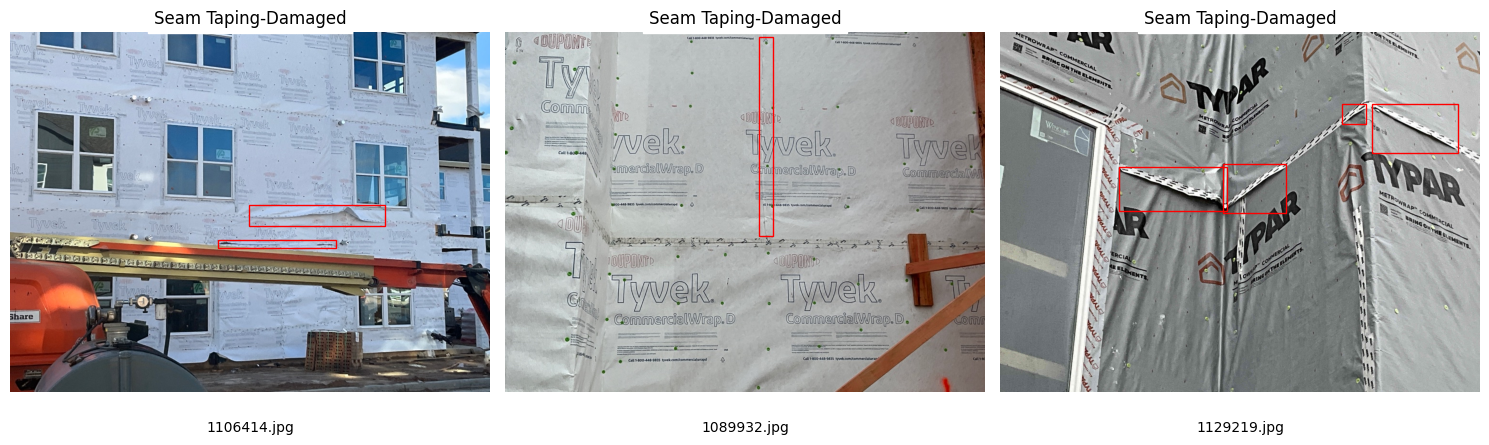

In [4]:
from utils.visualization_functions import visualize_random_images_with_bbox_annotations

# Load the JSON file containing the annotations
with open(json_dataset_path_bbox, 'r') as f:
    combined_annotations = json.load(f)

# Display the images
num_images_to_visualize = 3
visualize_random_images_with_bbox_annotations(combined_annotations, num_images_to_visualize)
